In [ ]:
#|default_exp explore 

# Exploring half a million molecules 

> Zooming into high resolution mass spectrometry data

## Exploring our Nextcloud data 

For our ASAP project research team we created a Nextcloud folder that we can use to easily share our data with [fairdatanow](https://pypi.org/project/fairdatanow/) Python package. Let's take a look what Wim has uploaded so far.   

In [ ]:
from fairdatanow import DataViewer
import os 

In [ ]:
configuration = {
    'url': "https://laboppad.nl/asap-data",
    'user':    os.getenv('NC_AUTH_USER'),
    'password': os.getenv('NC_AUTH_PASS')
}

In [ ]:
dv = DataViewer(configuration)

In [ ]:
dv

DataViewer(bytes_amount=np.int64(865727098), columns=['path', 'size', 'modified'], data=                                                   path       size    ext  \
0                                            asap-data/  825.6 MiB          
1                          asap-data/2022-151 Rossetti/  264.4 MiB          
2     asap-data/2022-151 Rossetti/2022-151- MOMS-ASA...    3.6 MiB  .pptx   
3     asap-data/2022-151 Rossetti/2022-151- MOMS-ASA...    3.7 MiB  .pptx   
4     asap-data/2022-151 Rossetti/2022-151- MOMS-ASA...    2.6 MiB  .pptx   
...                                                 ...        ...    ...   
1045  asap-data/2025 Théo-Fany Lange - the dutch met...    7.3 MiB   .raw   
1046  asap-data/2025 Théo-Fany Lange - the dutch met...    8.0 MiB   .raw   
1047                         asap-data/a-little-test.md    3 Bytes    .md   
1048                               asap-data/demo-data/   30.7 MiB          
1049      asap-data/demo-data/Ref0443_casein_asap01.RAW   30.7 MiB   .raw   

      byte_size                  modified  isdir  
0     865727098 2025-07-25 11:34:18+00:00   True  
1     277269735 2025-07-17 09:30:26+00:00   True  
2       3738826 2023-12-05 16:35:16+00:00  False  
3       3887554 2023-12-05 17:28:28+00:00  False  
4       2773236 2023-06-26 17:04:36+00:00  False  
...         ...                       ...    ...  
1045    7643548 2025-05-27 16:09:02+00:00  False  
1046    8395843 2025-05-27 16:22:16+00:00  False  
1047          3 2025-06-30 14:24:52+00:00  False  
1048   32156788 2025-07-25 11:34:18+00:00   True  
1049   32156788 2023-01-11 14:26:37+00:00  False  

[1050 rows x 6 columns], extensions=[], filtered_data=                                                   path      size  \
2     asap-data/2022-151 Rossetti/2022-151- MOMS-ASA...   3.6 MiB   
3     asap-data/2022-151 Rossetti/2022-151- MOMS-ASA...   3.7 MiB   
4     asap-data/2022-151 Rossetti/2022-151- MOMS-ASA...   2.6 MiB   
6     asap-data/2022-151 Rossetti/KMD plots/000_Temp...   1.5 MiB   
7     asap-data/2022-151 Rossetti/KMD plots/KMDplot_...   3.4 MiB   
...                                                 ...       ...   
1044  asap-data/2025 Théo-Fany Lange - the dutch met...   6.7 MiB   
1045  asap-data/2025 Théo-Fany Lange - the dutch met...   7.3 MiB   
1046  asap-data/2025 Théo-Fany Lange - the dutch met...   8.0 MiB   
1047                         asap-data/a-little-test.md   3 Bytes   
1049      asap-data/demo-data/Ref0443_casein_asap01.RAW  30.7 MiB   

                      modified  
2    2023-12-05 16:35:16+00:00  
3    2023-12-05 17:28:28+00:00  
4    2023-06-26 17:04:36+00:00  
6    2023-06-21 09:37:36+00:00  
7    2023-12-05 17:28:10+00:00  
...                        ...  
1044 2025-05-27 15:55:52+00:00  
1045 2025-05-27 16:09:02+00:00  
1046 2025-05-27 16:22:16+00:00  
1047 2025-06-30 14:24:52+00:00  
1049 2023-01-11 14:26:37+00:00  

[901 rows x 3 columns], name='DataViewer00121', search='', show_directories=False, show_filters=False, use_regex=False)

For this example we want to download a demo data file `Ref0443_casein_asap01.RAW` from the Nextcloud server to our local computer. This can be done by typing the filename and Enter key in the search bar. We can now select the file by clicking the row by clicking. Downloading the selection is done with the method `.download_selected()`

In [ ]:
files = dv.download_selected()

Ready with downloading 1 selected remote files to local cache: /home/frank/.cache/fairdatanow                                                                      


::: {.callout-note} 

Due to security restrictions at this moment you can not yet download from our Nextcloud server unless you are a member of our team! We are working to open up our data for you soon!   

:::

It is also possible to export the complete filter settings with the `.export_filters()` method. 

In [ ]:
dv.export_filters()

{'columns': ['path', 'size', 'modified'],
 'extensions': ['.raw'],
 'search': 'ref0443',
 'show_directories': False,
 'show_filters': True,
 'use_regex': False}

## Reading our first .raw file

First step is to read an .raw file containing (already centroided) ASAP-HRMS data. The data can be loaded into a positive and a  negative mode dataframe as with the `read_raw()` function which returns two dataframes for positive and negative mode. This function is based on the [pyRawTools](https://pypi.org/project/pyRawTools/) python package. 

In [ ]:
from kendrick import read_raw

In [ ]:
raw_file = '../downloads/kendrick-data/Ref0443_casein_asap01.RAW'

In [ ]:
df_pos, df_neg = read_raw(raw_file) 

Let's focus on the positive mode data for now. Here is what the first and last rows of the dataframe looks like. 

In [ ]:
df_pos

,RT,mz,inty
Scan,,,
1,0.003945,125.023285,10221.680664
1,0.003945,125.059830,81648.109375
1,0.003945,125.132690,35949.582031
1,0.003945,126.062935,6891.418945
1,0.003945,126.099777,18121.056641
...,...,...,...
390,3.005163,546.237732,35105.105469
390,3.005163,548.254578,52922.070312
390,3.005163,596.266724,100884.796875


Inspecting the `df_pos` dataframe we find 271982 rows with three columns: 1) **RT** *retention time*, 2) **mz** *mass per electrical charge*, and 3) **inty** *number of ions*. From the first column one can see that this experiment lasted 3 minutes. 

As we will see, m/z values for identical molecules are slightly jittered due to limited instrumental precision. In order to determine the abundance of different molecules present in the sample, we now need to create time averaged centroided m/z values. This can be achieved by 1) first binning the data in a histogram, 2) then Gaussian smoothing the histogram and locating the peaks. These steps are implemented in the functions `histogram()` and `get_time_averaged_centroids()`. 

Next step is to explore the data in an interactive visualization. In order to plot half a million data points in a single plot we need to import a special function `interactive_plot()`. This function makes heavily use of a powerful python package [datashader](https://datashader.org/) that is designed for fast plotting huge numbers of data points. 

::: {.callout-note}
Note that in order to activate interactive plotting in a Jupyter notebook you need to execute the following notebook magic command in a code cell: 
    %matplotlib widget
:::

In [ ]:
%matplotlib widget

In [ ]:
from kendrick import histogram, get_time_averaged_centroids, interactive_plot 

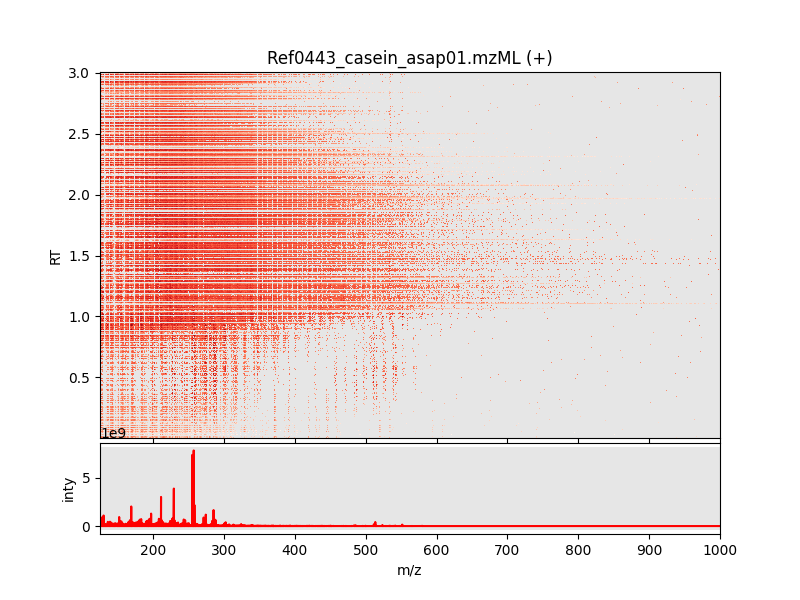

In [ ]:
mz_hist = histogram(df_pos)
mz_centroids = get_time_averaged_centroids(mz_hist)

interactive_plot(df_pos, mz_hist, mz_centroids)

![Zooming-in](images/zooming-in.gif)

In [ ]:
#|export 

import pyRawTools as rwt 
import dask.array as da 
import scipy.signal as ssg 
from scipy.ndimage import gaussian_filter 
import numpy as np 

import datashader as ds
import datashader.transfer_functions as tf
from datashader.mpl_ext import dsshow 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

from functools import partial  

In [ ]:
#|export 

def read_raw(raw_file): 
    '''Read `raw_file` into positive and negative mode data frames. '''

    loader = rwt.MSLoader()
    df = loader.load(raw_file) 
    df.columns = ['RT', 'mz', 'inty']
    df_pos = df.iloc[::2]
    df_neg = df.iloc[1::2] 

    return df_pos, df_neg
    

def read_mzml(mzml_file): 
    '''Read `mzml_file`. 
    
    Returns positive and negative mode dataframes `df_pos` and `df_min`. '''

    # load example file
    exp = oms.MSExperiment()
    oms.MzMLFile().load(mzml_file, exp) 
    df_long = exp.get_df(long=True) 

    # split +/- 
    df_pos = df_long.iloc[::2] # positive?
    df_neg = df_long.iloc[1::2] # negative? 

    return df_pos, df_neg 


def histogram(df):
    '''Create intensity weighed histogram. '''

    # create dask arrays 
    x = da.from_array(df['mz'])
    y = da.from_array(df['inty']) 
    
    # make dask histograms 
    #mz_hist, bins = da.histogram(x, bins=10000000, range=[0, 1000]) # simply number of mass points in bin 
    mz_hist_w, bins = da.histogram(x, weights=y, bins=10000000, range=[0, 1000]) # weighed with intensities 
    
    # bin centers for plotting 
    bin_delta = bins[1] - bins[0]
    bin_centers = bins[0:-1] + 0.5 * bin_delta 

    mz_hist_w_xy = np.c_[bin_centers, mz_hist_w]

    return mz_hist_w_xy

def get_time_averaged_centroids(mz_hist_w_xy):
    '''Get peaks (centroids) from histogram. '''
    
    bin_centers, mz_hist_w = mz_hist_w_xy.T 
    
    # gaussian smoothing of weighed histogram 
    mz_hist_w_gauss = gaussian_filter(mz_hist_w, sigma=2)
    
    # find peaks 
    peak_idxs_w_gauss, props_dict_w = ssg.find_peaks(mz_hist_w_gauss, height=4000, distance=50) # bit ad hoc 
    peak_heights_w_gauss = props_dict_w['peak_heights'] 

    mz_x = bin_centers[peak_idxs_w_gauss] 
    mz_y = peak_heights_w_gauss 

    mz_centroids = np.c_[mz_x, mz_y]
    
    return mz_centroids  

def interactive_plot(df, mz_hist, mz_centroids): 
    '''Create interactive plot for dataframe `df`. '''

    mz_hist_x, mz_hist_y = mz_hist.T
    mz_centroids_x, mz_centroids_y = mz_centroids.T
    
    
    fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=[8, 6], gridspec_kw={'height_ratios':[4, 1]}, squeeze=True) 
    
    # number histogram 
    #ax0.plot(bin_centers, mz_hist, c='r')
    #ymin, ymax = ax0.get_ylim()
    #ax0.vlines(bin_centers[peak_idxs_w_gauss], ymin=ymin, ymax=ymax, color=[0.9, 0.9, 0.9], zorder=-10) 
    #ax0.set_ylabel('bin count')
    #ax0.set_title('Ref0443_casein_asap01.mzML (+)')
    mz_min = df['mz'].min()
    
    
    # datashader beast (the most complicated single plot command I have ever made)
    glyph = ds.Point('mz', 'RT') 
    dsshow(df, glyph, aggregator=ds.sum('inty'), ax=ax1, x_range=[100, 1000], plot_height=500, 
           plot_width=1000, aspect='auto', cmap=cm.Reds, norm='log',  
           shade_hook=partial(tf.dynspread, threshold=0.7, max_px=7, how='add')) 
    ymin, ymax = ax1.get_ylim()
    ax1.vlines(mz_centroids_x, ymin=ymin, ymax=ymax, color=[0.9, 0.9, 0.9], zorder=-10)
    ax1.set_ylabel('RT')
    ax1.set_title('Ref0443_casein_asap01.mzML (+)')
    
    # intensity weighed histogram 
    ax2.plot(mz_hist_x, mz_hist_y, color='r')
    ymin, ymax = ax2.get_ylim()
    ax2.vlines(mz_centroids_x, ymin=ymin, ymax=ymax, color=[0.9, 0.9, 0.9], zorder=-10) 
    ax2.set_ylabel('inty')
    ax2.set_xlabel('m/z')
    ax2.set_xlim([mz_min, 1000])
    
    plt.subplots_adjust(hspace=0.02)